1) Adding the necessary libraries:

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
2) Importing the csv file containing the necessary data:

In [17]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
Checing for the presence of null values:

In [109]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
It can be observed that there are no null values present in the data.

In [ ]:
Checking the type of data present in each column:

In [110]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
Segregating the columns as per the type of data present,i.e,numerical or categorical. From the subset of data displayed above, it is observed that the Age,Experience,Income,CCAvg and Mortgage columns contain continuous data and are assumed to hold relevance to the likelihood of obtaining personal loans while the categorical columns that contain separable classes include the Family,Education,Personal Loan,Securities Account,CD Account, Online and Credit Card Columns respectively.

In [31]:

numerical_data_cols=data[['Age','Experience','Income','CCAvg','Mortgage']].columns
categorical_data_cols=data[['Education','Family','Securities Account','CD Account','Online','CreditCard']].columns

In [ ]:
3) Visualizing the data present in various columns and observing their relationships with the help of pair plots.

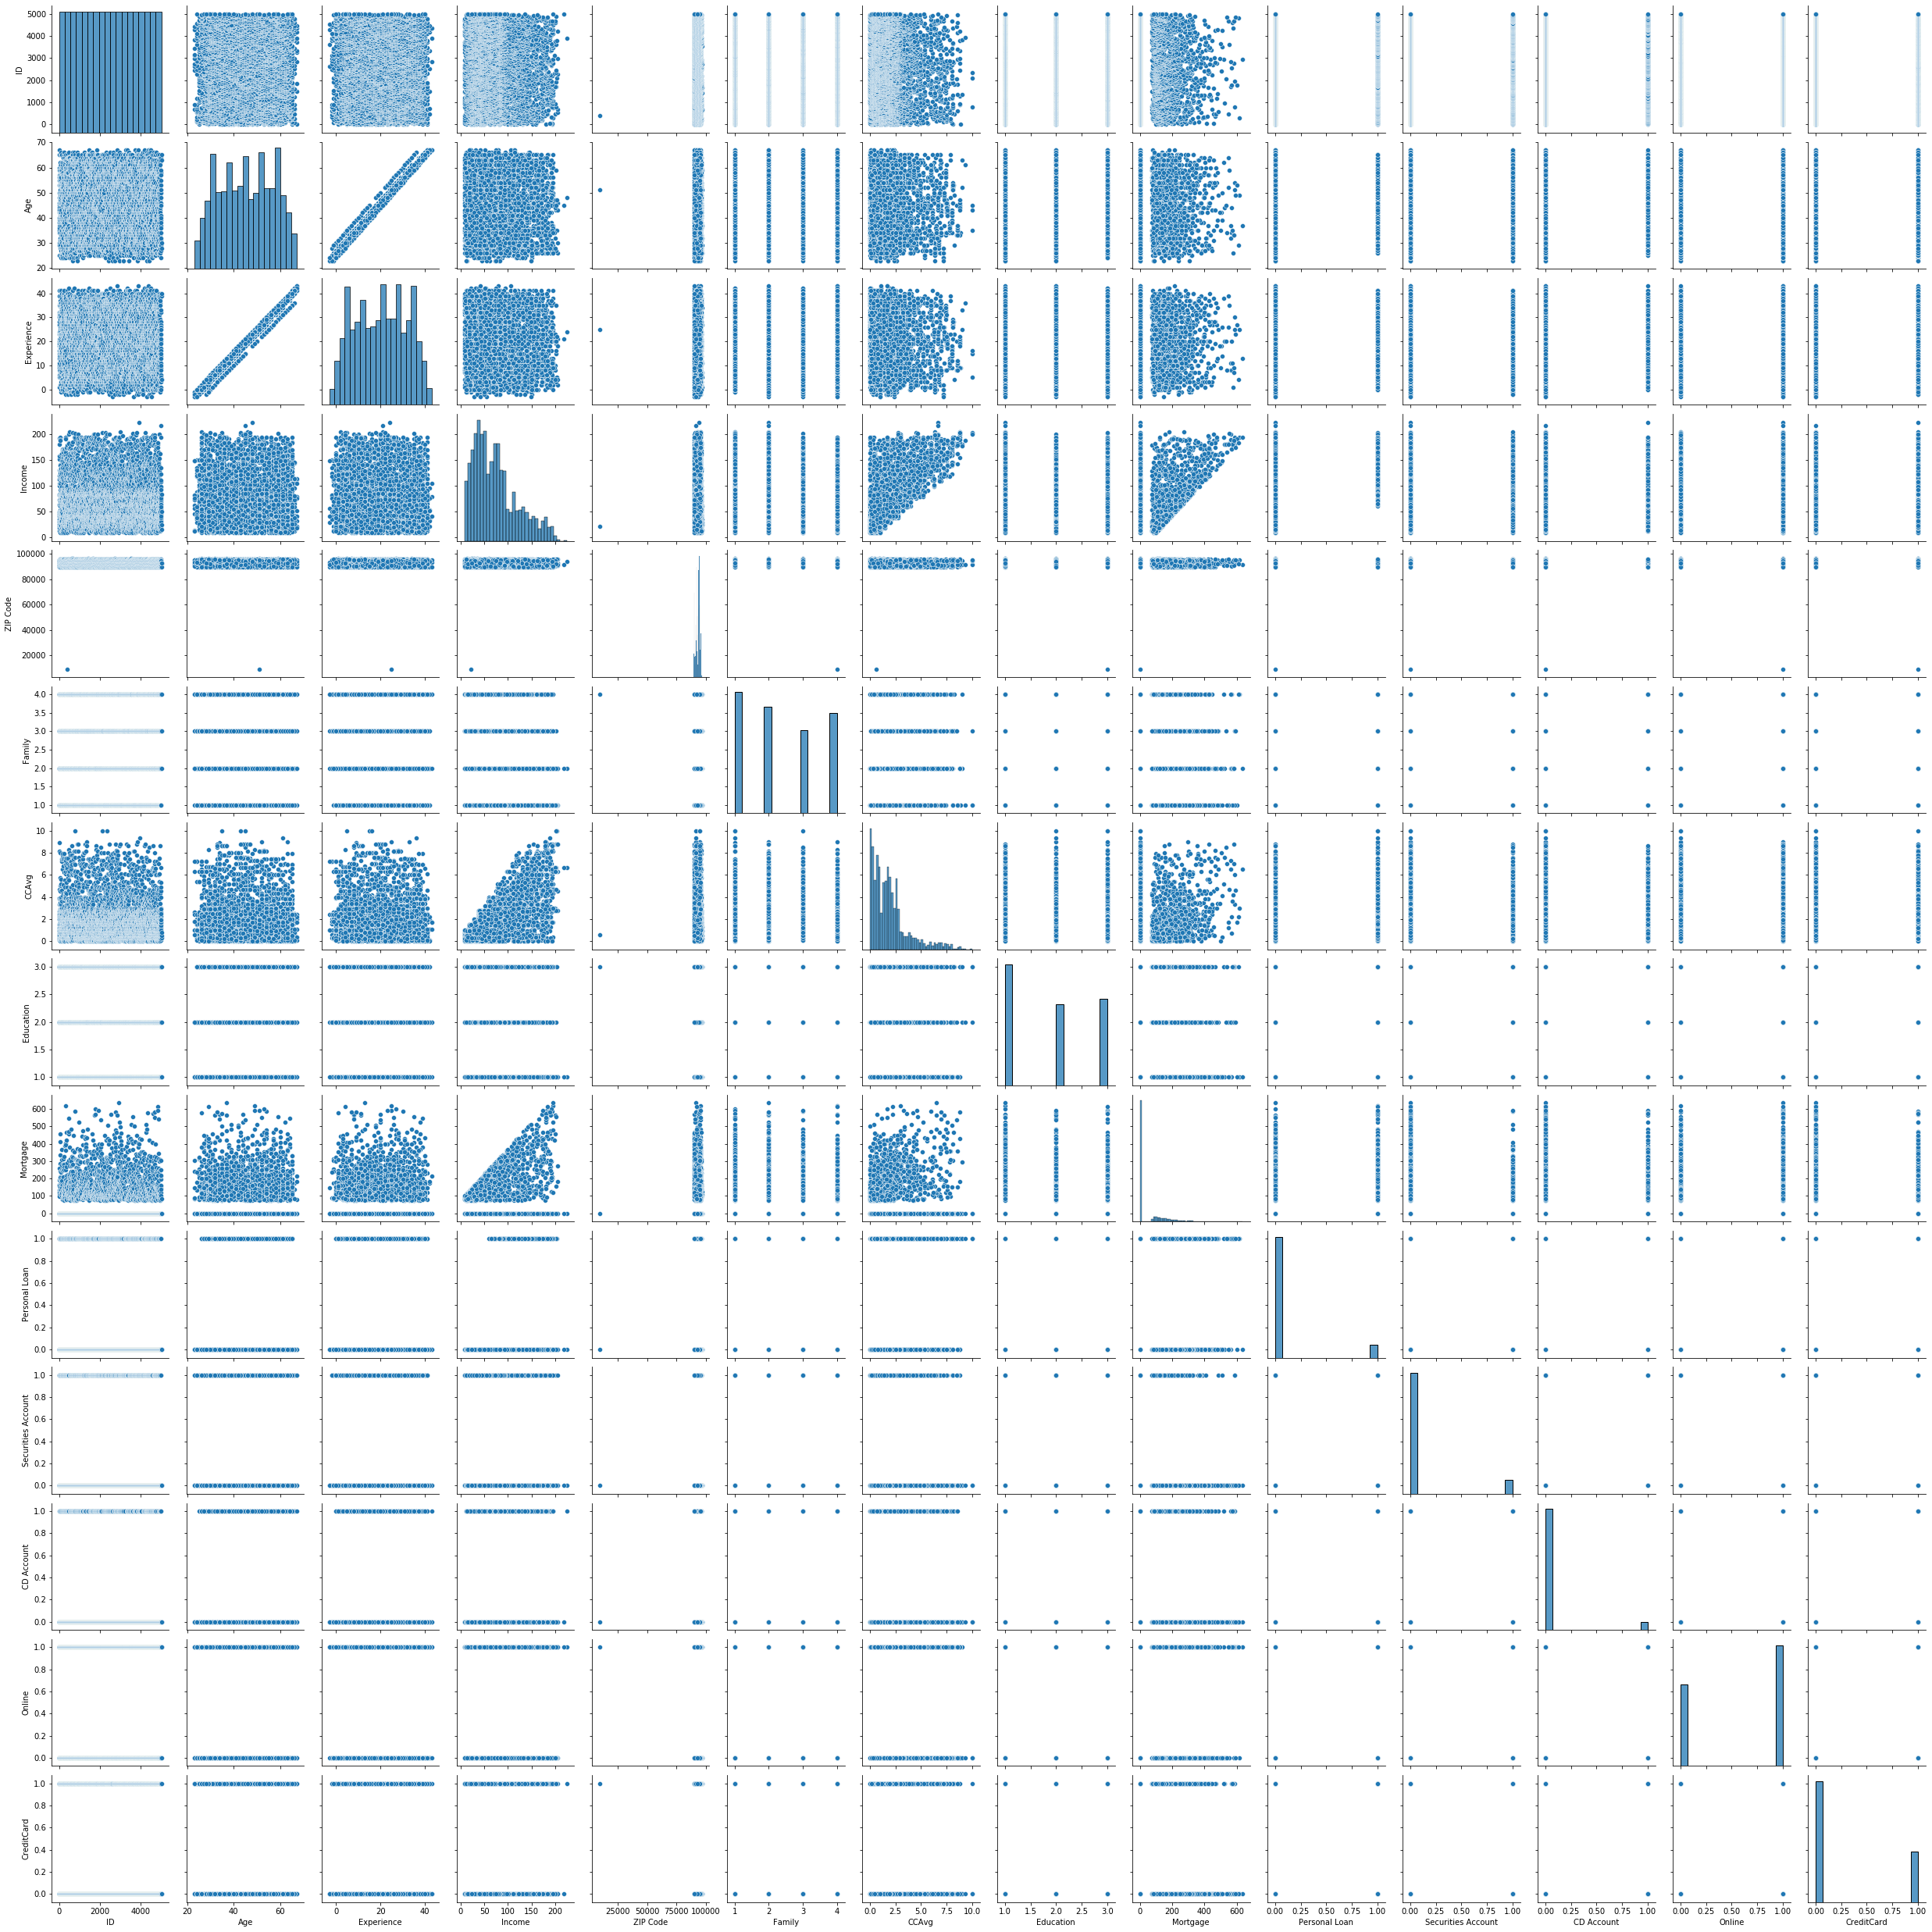

In [5]:
sns.pairplot(data)

In [ ]:
From the pairplot displayed above, a direct linear relationship between Age and Experience columns is observed, which is clearly expected to occur. Some amount of positive collinearity can be observed between Income and CCAvg as well. This may be due to an increase in credit cart spending limit with increase in income which in turn could lead to an increased average spending.

In [105]:
numeric1=data._get_numeric_data()
numeric1=numeric1[['Age','Experience','Income','Family','CCAvg','Mortgage']]
numeric1.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


Age


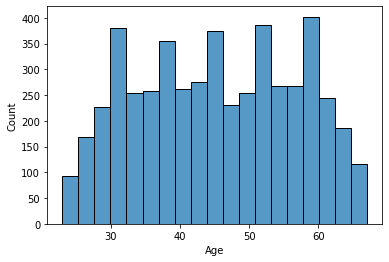

Experience


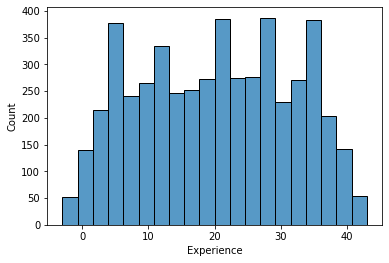

Income


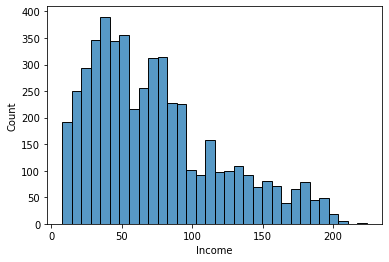

Family


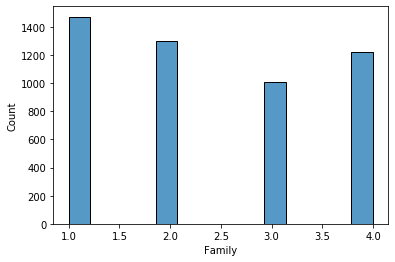

CCAvg


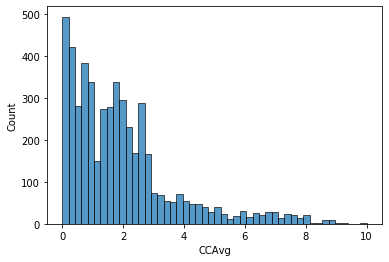

Mortgage


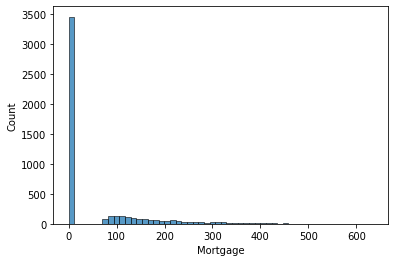

In [108]:
for col in numeric1.columns:
    print(col)
    sns.histplot(x=col,data=data)
    plt.show()

In [106]:
numeric1.skew(axis = 0, skipna = True) 

Age          -0.029341
Experience   -0.026325
Income        0.841339
Family        0.155221
CCAvg         1.598443
Mortgage      2.104002
dtype: float64

In [ ]:
It is seen from the pairplot,histplot as well as the skewness that the data present in the income,CCAvg and Mortgage columns are left skewed in nature while a uniform distribution is observed in the Age,Experience and Family columns.
i) Most of the participants in the data are observed to earn an income in the range of 0-100.
ii)The average credit card spending of most of the participants is found to be on the lower side.
iii) Most of the participants are found to have 0 Mortgage while very few participants have mortgage between 100 to 500.

In [ ]:
Getting the correlation between the different columns in order to check for the presence of dependent features and their removal if found to be unnecessary in predicting the likelihood of obtaining personal loans.

In [4]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
i)From the correlation map, a high amount of collinearity is observed between age and experience as expected and are not correlated with personal loan.
ii) A certain amount of collinearity is observed between income and CC Average as well. However, they are also found to influence the data present in Personal Loan and thus will be taken into consideration.
iii) ID,ZIP Code do not possess any influence on obtaining personal loans and can thus be eliminated.

In [ ]:
3) Obtaining the target column distribution:
    First, a count of the number of personal loans taken is plotted and observed.

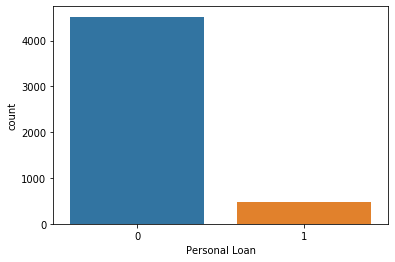

In [19]:
sns.countplot(x='Personal Loan',data=data)

In [ ]:
From the countplot above, it is observed that majority of the participants have not taken a personal loan and very few have availed a personal loan.

In [ ]:
Cbecking the distribution of the numerical data and categorical data based on personal loans:

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

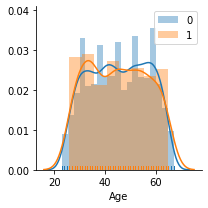

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

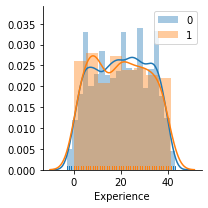

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

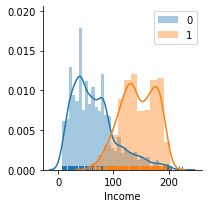

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

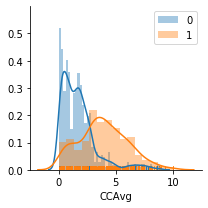

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

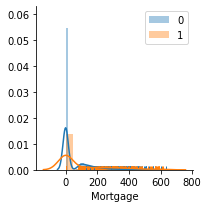

In [32]:

for col in numerical_data_cols:
    g = sns.FacetGrid(data, hue="Personal Loan")
    g.map(sns.distplot, col,  hist=True, rug=True)
    plt.legend()
    plt.show()

In [ ]:
From the numerical distribution based on the target column, the following can be observed:
i) For both age and experience columns, a fairly uniform target column distribution is observed, indicating the absence of relation between availing personal loans and the age groups. However, in the age group of around 25-35, the count of people availing loans is found to be slightly higher which could be because the participants belonging to this age group may be newly established professionals(between 0-10 years of experience as seen in the experience distribution ) and may have no or lesser income. At higher age groups, the count of those who have not availed loans is found to increase or be equal.
ii) The target distribution based on income does not provide any immediate inference between the income range and the availment of loans. However, if a minimum income condition is found to exist for obtaining loans, those with a lower range of income may not have been eligible and thus may not have been given loans.
iii) More number of participants having CC Average between 0-5 have not taken a loan while the count of those who have availed a loan is higher for those having CC Average between 5 to 10.
iv) Most of the participants having 0 mortgage have not availed a loan.

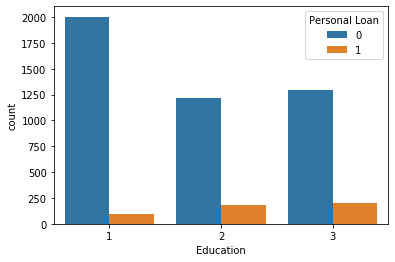

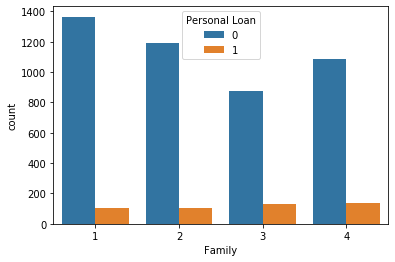

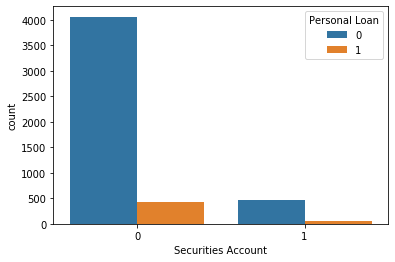

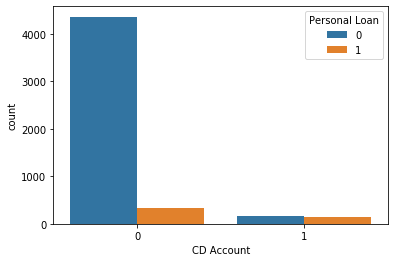

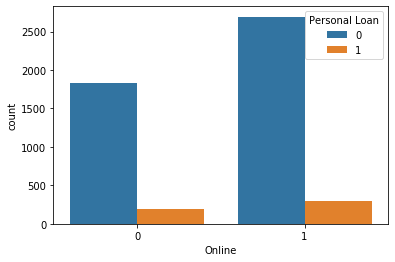

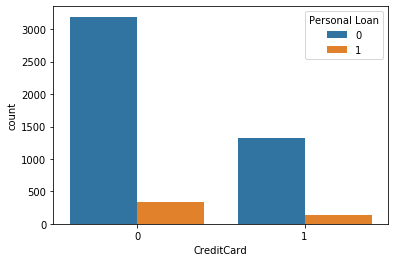

In [258]:
for col in categorical_data_cols:
    sns.countplot(x =col, hue = "Personal Loan", data = data)
    plt.show()

In [ ]:
Observations from categorical data distribution on the basis of target column values:
    Majority of the customers are of level 1(students) and have not availed loans in each categorical distribution.
    i) Majority of customers who are students, graduates and advanced graduates/professionals have not availed a loan. However the count of those who have availed personal loans increases with increase in the level of education.
    ii) Most of the customers who have taken loans belong to families that have 3 or 4 members which can be expected due to higher value of expenses. However there is not much difference in the count of those families who have availed loans across all groups(1,2,3,4)
    iii) Most of the customers do not have securities accounts and the count of those who have availed loans is found to be higher in the case of the group of customers who do not have securities account.
    iv)Most of the customers do not have certificate of deposit and majority of customers who have availed loans do not have certificate of deposit.
    v)Most of the customers use online banking facilities and the majority count of those who have availed loans belong to the category of using internet banking facilities.
    vi) Most of the customers do not have credit cards. Most of those who have taken loans do not have credit cards. This can be expected since those having credit cards can use the same to borrow money as debt instead of taking loans.

In [ ]:
Checking for the presence of outliers:

In [122]:
data1=data
index1=[]
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
IQR
for col in numeric1.columns:
    #index=[]
    outliers = data1[((data1[col] < (Q1[col] - 1.5 * IQR[col])) |(data1[col] > (Q3[col] + 1.5 * IQR[col])))][col]
    index=(data1[((data1[col] < (Q1[col] - 1.5 * IQR[col])) |(data1[col] > (Q3[col] + 1.5 * IQR[col])))].index)
    #print(index)
    if np.array(index).sum()!=0:
        index1.append(index)
    print(outliers)


Series([], Name: Age, dtype: int64)
Series([], Name: Experience, dtype: int64)
18      193
47      194
53      190
59      188
303     195
       ... 
4659    199
4670    194
4895    201
4981    195
4993    218
Name: Income, Length: 96, dtype: int64
Series([], Name: Family, dtype: int64)
9       8.90
18      8.10
44      5.70
55      8.00
61      5.70
        ... 
4908    6.10
4911    7.50
4937    8.60
4980    5.30
4993    6.67
Name: CCAvg, Length: 324, dtype: float64
22      260
39      285
42      412
59      455
66      336
       ... 
4859    541
4865    342
4899    299
4942    308
4963    306
Name: Mortgage, Length: 291, dtype: int64


In [ ]:
From the above list, it is seen that outliers are present in the mortgage and CC Average columns. The combined index values containing the outliers have been saved in other list as shown in the next cell.

In [123]:
data1=data
index2=index1[0] | index1[1]
index2
data2=data1.drop(index2, inplace=False)

In [ ]:
Printing the number of outliers and the shape of the original and the new dataframe following the removal of outliers:

In [257]:
print(len(index2))
print(data.shape)
print(data2.shape)

377
(5000, 14)
(4623, 14)


In [ ]:
There are 377 outliers which have been removed and a new dataframe data2 has been created with the removed outliers.

In [ ]:
From the above cell, it is seen that a new dataframe 'Data2' has been created from the original dataframe containing the dataset after removing the outliers. We use both these dataframes and train 2 separate models to infer the relevance of these outliers in the dataset.

In [ ]:
Generating boxplots of the data with and without the presence of outliers:

In [ ]:
With outliers:

Age


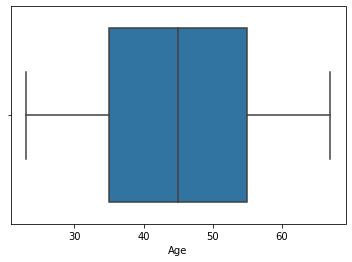

Experience


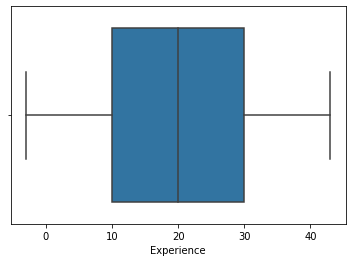

Income


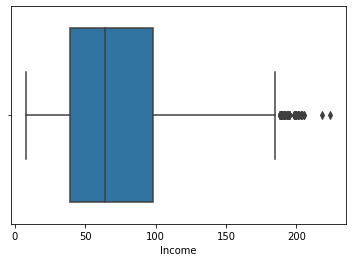

Family


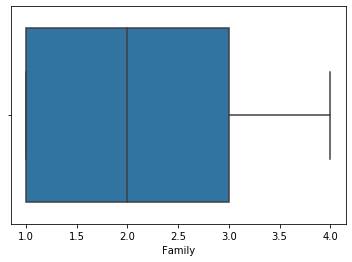

CCAvg


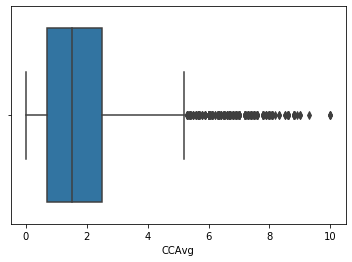

Mortgage


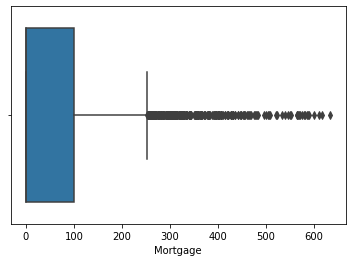

In [111]:
for col in numeric1.columns:
    print(col)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
ii) Without outliers

Age


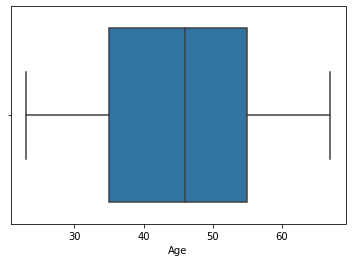

Experience


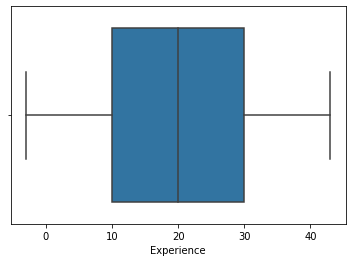

Income


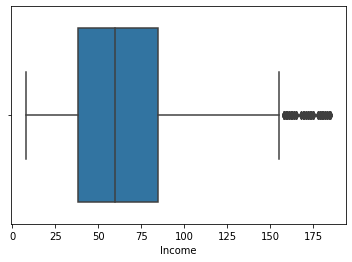

Family


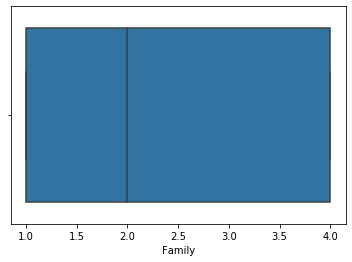

CCAvg


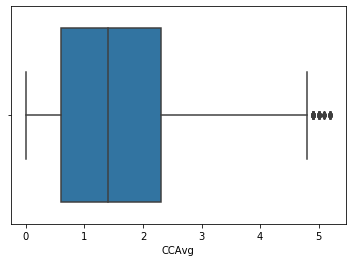

In [117]:
for col in numeric1.columns:
    print(col)
    sns.boxplot(x=data2[col])
    plt.show()

In [ ]:
In order to check and compare the performances of a model with and without the outliers, the classfication reports for both the datasets(i.e dataset with outliers and without outliers) are compared.

In [128]:
x=data2.drop(columns=['ZIP Code','Personal Loan','ID','Experience'])
#XScaled  = x.apply(zscore)
y=data2['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 
model1=GaussianNB()
model1.fit(x_train,y_train.ravel())
y_pred=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1286
           1       0.38      0.52      0.44       101

    accuracy                           0.90      1387
   macro avg       0.67      0.73      0.69      1387
weighted avg       0.92      0.90      0.91      1387



In [129]:
x=data.drop(columns=['ZIP Code','Personal Loan','ID','Experience'])
#XScaled  = x.apply(zscore)
y=data['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 
model1=GaussianNB()
model1.fit(x_train,y_train.ravel())
y_pred=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



In [ ]:
It is seen that the precision and recall are better in the case of the model trained with the dataset containing outliers and thus it can be inferred that the outliers may provide relevant information in prediction of obtaining personal loans.

In [ ]:
5)Using Naive Bayes,Logistic Regression and KNN Classifier models in order to predict the likelihood of customer buying personal loans:
    i) Naive Bayes Technique:
        Here the data need not be standardized since the Gaussian NB estimator function standardizes the data in order to compute the probability density which is in turn used for prediction.
        The ZIP Code,Personal Loan,ID and Experience Columns are removed from the input training data due to their irrelevance in the predicition of customers buying personal loans. Since age and experience are linearly correlated,the experience feature is removed while age feature is kept for training.

In [ ]:
Splitting the data into training and test data in the ratio of 70%:30% respectively:

In [210]:
x=data.drop(columns=['ZIP Code','Personal Loan','ID','Experience'])
y=data['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model1=GaussianNB()
model1.fit(x_train,y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Evaluating model using test data and computing the accuracy,confusion matrix,classification report and ROC:

In [211]:
y_pred=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.892

In [ ]:
An accuracy of 89.2% is obtained. The accuracy score may not be a true measure of the model performance since the number of 0s in the output training data is very high as compared to the number of 1s.

In [214]:
confusion_nb=confusion_matrix(y_test, y_pred)
confusion_nb

array([[1244,   99],
       [  63,   94]], dtype=int64)

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



In [ ]:
i)The accuracy is 89.2%
ii)It is observed that the precision and recall for y=1 are 0.49 and 0.60 respectively.
iii) The f1-score is found to be 0.94 for y=0 and 0.54 for y=1.

In [ ]:
Plotting the ROC Curve and finding the model evaluation score:

0.7625052762377222


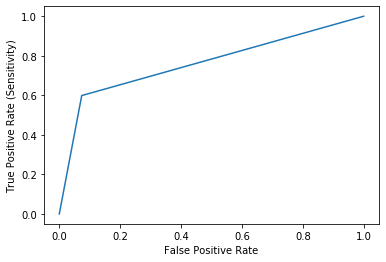

In [215]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

0.9351200610857905


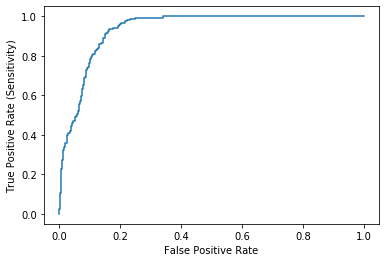

In [133]:
fpr,tpr,threshold=roc_curve(y_test,y_pred1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
The area under ROC Curve using predict values(0,1) is 0.7625 while that using probability of the predicted values is found to be 0.9351.

In [ ]:
ii) Logistic Regression:
    The data is standardized to remove skewness in the distribution and thereby making the classification more effective.
    The 0 value in various columns is set to the mean of the data present in the corresponding column.

In [140]:
x=data.drop(columns=['ZIP Code','Personal Loan','ID','Age'])
XScaled  = x.apply(zscore)
y=data['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,random_state=42)
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

In [ ]:
Fitting the logistic regression model:

In [141]:

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
y_predict1=model.predict_proba(x_test)

C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
Computing the accuracy score,confusion matrix and obtaining the classification report and ROC Curve:

In [142]:
acc=accuracy_score(y_test,y_predict)
acc

0.9513333333333334

In [221]:
confusion_logistic=confusion_matrix(y_test, y_predict)
confusion_logistic

array([[1324,   19],
       [  54,  103]], dtype=int64)

In [216]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.84      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
i)The accuracy is 95.13%
ii)The precision and recall values for y=1 ar 0.84 and 0.66 respectively and are found to be better than that obtained from the Naive Bayes Classification.
iii) The f1-score is found to be 0.97 for y=0 and 0.74 for y=1.

0.8209517621448321


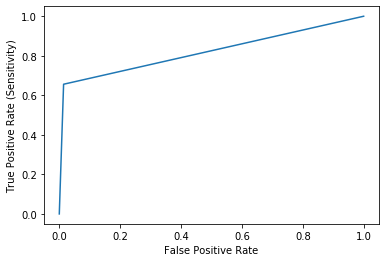

In [208]:
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

0.966630464166639


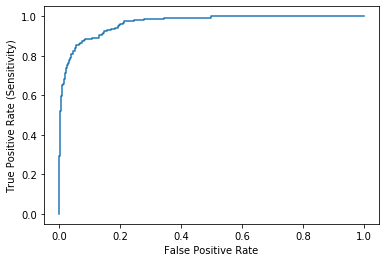

In [146]:
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
The Area under the ROC Curve plotted using the predicted y values(0,1) and the probabilities of the predicted y values are found to be 0.8209 and 0.9663 respectively. The logistic regression classifier is thus found to show more improvement as compared to Naive Bayes.

In [ ]:
iii) K Nearest Neighbour Classifier:
    The data is standardized before being passed on to the KNN estimator.
    The optimal k value is found by iterating over KNN Classifiers using several values of k and comparing with their error rates.
    The irrelevant columns are dropped from the input data. 

In [230]:
x=data.drop(columns=['Personal Loan','ID','Experience','Age','ZIP Code'])
XScaled  = x.apply(zscore)  # convert all attributes to Z scale 


In [231]:
y=data['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,random_state=42)

In [ ]:
Finding the optimal k-value using error rate calculations for different values of k:

Text(0, 0.5, 'Error Rate')

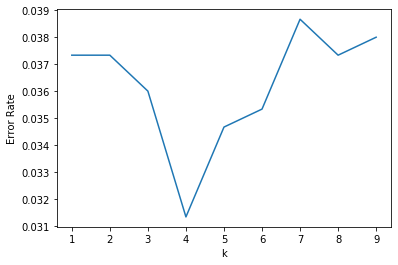

In [232]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(x_train,y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i != y_test))
plt.plot(range(1,10),error_rate)
plt.xlabel('k')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

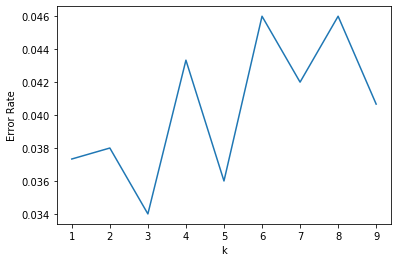

In [233]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(range(1,10),error_rate)
plt.xlabel('k')
plt.ylabel('Error Rate')

In [ ]:
It can be inferred that the distance weight parameter yields lesser error as compared to uniform weight parameter. The optimal value of k as seen in the first graph is 4. However, we the rule of thumb to choose a odd value of k is followed and thus k=5 is chosen.

In [ ]:
Fitting the model using the train values:

In [246]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
Obtaining the accuracy,confusion matrix,classification report and ROC Curve:

In [247]:
y_predicted = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.9653333333333334

In [248]:
confusion_knn=confusion_matrix(y_test, y_predicted)
confusion_knn

array([[1337,    6],
       [  46,  111]], dtype=int64)

In [249]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.95      0.71      0.81       157

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.90      1500
weighted avg       0.96      0.97      0.96      1500



In [ ]:
i) The accuracy is found to be 96.86%
ii) The precision and recall values for y=1 are 0.95 and 0.71 respectively.
iii) The f1-score is found to be 0.98 for y=0 and 0.81 for y=1.
It can be inferred that the KNN Classifier is found to show a better performance in classification for this dataset.

0.851269379799005


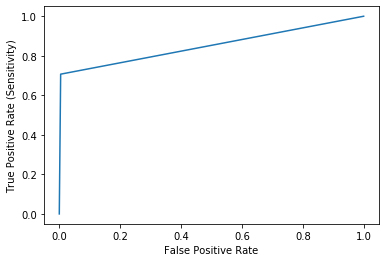

In [252]:
y_predicted1 = NNH.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predicted)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

0.9705858639513212


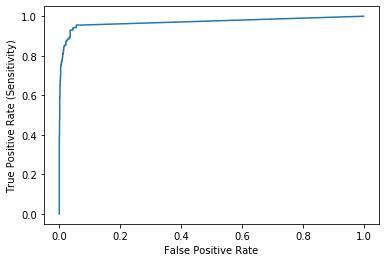

In [253]:
fpr,tpr,threshold=roc_curve(y_test,y_predicted1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
The area under ROC for predicted value of y(0/1) is found to be 0.8643 while for the probability of predicted values, the area is found to be 0.9550. This shows that the KNN Classifier yields a better model evaluation score.

In [ ]:
6) Printing Confusion Matrices and ROC Curves for all the 3 Classifiers:

In [250]:
print("Naive Bayes Confusion Matrix")
print(confusion_nb)
print("Logistic Regression Confusion Matrix")
print(confusion_logistic)
print("KNN Confusion Matrix")
print(confusion_knn)

Naive Bayes Confusion Matrix
[[1244   99]
 [  63   94]]
Logistic Regression Confusion Matrix
[[1324   19]
 [  54  103]]
KNN Confusion Matrix
[[1337    6]
 [  46  111]]


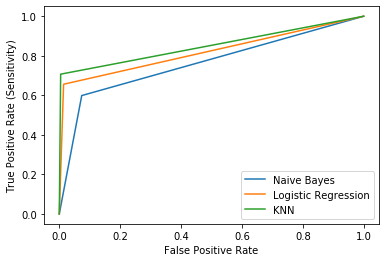

In [251]:
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred)
fpr2,tpr2,threshold2=roc_curve(y_test,y_predict)
fpr3,tpr3,threshold3=roc_curve(y_test,y_predicted)
plt.plot(fpr1, tpr1,label='Naive Bayes')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot(fpr3, tpr3,label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

In [ ]:
7) i)In order to analyze the performance of all 3 models, the prediction for y=1 is given more consideration due to its lower proportion in the dataset which in turn implies the chances of higher misclassification errors.
   ii)From the analysis that has been carried out on each classifier, it can be inferred that the KNN Classifier is found to show better true positive classifications as compared to the Naive Bayes and Logistic Regression Classifiers. This can be observed through the comparison of the Precision,Recall,fl-score and the AUC for all the 3 classifers.
   iii)However, since KNN is a non parametric model and needs to use data for each prediction,it can be more time consuming in which case, the logistic regression classifier seems to be a better fit.
Thus for this particular dataset where the sample size is small as compared to real word dataset,time constraint may not pose an issue and thus KNN can be considered to be a better classifier due to better performance metrics.